# Scraping scrapethissite.com

In [1]:
# Import packages 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

### Understand structure 

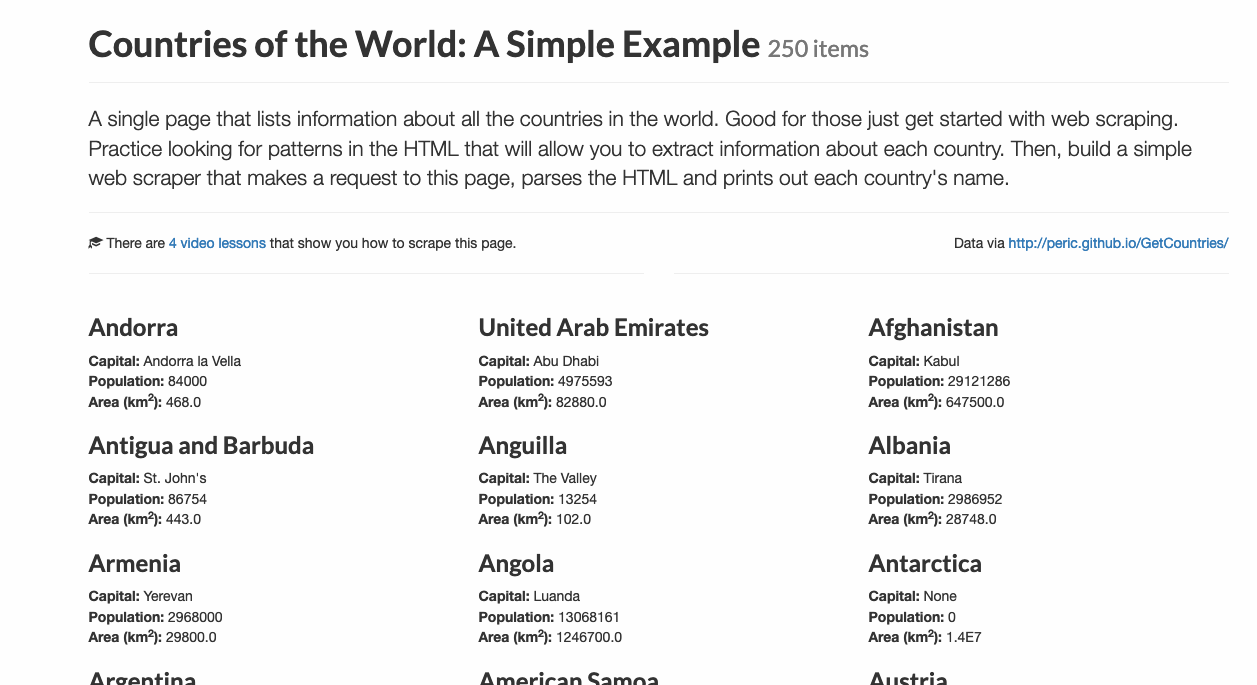

In [2]:
html = requests.get("https://www.scrapethissite.com/pages/simple/")
html.status_code

200

In [3]:
doc = BeautifulSoup(html.text, "html5lib")

In [4]:
doc.find_all(class_ = "col-md-4 country")[0]

<div class="col-md-4 country">
                        <h3 class="country-name">
                            <i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>
                        <div class="country-info">
                            <strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
                            <strong>Population:</strong> <span class="country-population">84000</span><br/>
                            <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
                        </div>
                    </div>

In [5]:
doc.find_all(class_ = "col-md-4 country")[0].find(class_ = "country-info")

<div class="country-info">
                            <strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
                            <strong>Population:</strong> <span class="country-population">84000</span><br/>
                            <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
                        </div>

In [6]:
doc.find_all(class_ = "col-md-4 country")[0].\
find(class_ = "country-info").find(class_ = "country-capital").get_text()

'Andorra la Vella'

In [7]:
doc.find_all(class_ = "col-md-4 country")[0].\
find(class_ = "country-info").find(class_ = "country-capital").get_text()

'Andorra la Vella'

### Scrape the country data 

In [8]:
# Import packages 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time


# Prepartions 
Liste = ["country-capital", "country-population", "country-area"]
Countries = []
Capital = []
Population = []
Area = []
cols = [Capital, Population, Area]


# Get the html file and prepare it 
html = requests.get("https://www.scrapethissite.com/pages/simple/")
doc = BeautifulSoup(html.text, "html5lib")
html_data = doc.find_all(class_="col-md-4 country")


# Data Scraping 

# Get the names of the countries
for i in doc.find_all(class_ = "col-md-4 country"): 
    Country_name = i.find(class_ = "country-name").get_text().strip()
    Countries.append(Country_name)


# Get values of the coutries 
for element, col_name in zip(Liste, cols):
    for i in html_data:
        # Find the specific element within each HTML data
        info = i.find(class_="country-info").find(class_=element)
        
        # Check if the info exists before extracting text
        if info:
            text = info.get_text().strip()
        else:
            text = "N/A"  # If the information is not found, assign it as "N/A"
        
        col_name.append(text)


# Built dataset
data_scraped = pd.DataFrame({"Country": Countries, "Capital": Capital, "Population": Population, "Area": Area})

data_scraped.head()

,Country,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0
